# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt



In [2]:
def f(x):
    return -x**4 + 4*x**2 - 2*x + 13

def f2(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

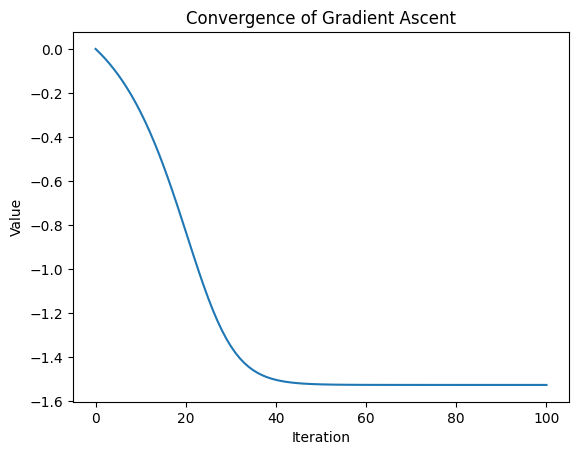

Optimal value: -1.5256868600845337


In [3]:
#1a
iter = 100
learningRate = 0.01

x = torch.tensor([0.0], requires_grad=True)
conv = [x.item()]
optimizer = torch.optim.SGD([x], lr=learningRate, maximize=True)

for _ in range(iter):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()
    conv.append(x.item())
plt.plot(range(iter+1), conv)
plt.title('Convergence of Gradient Ascent')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()
print(f'Optimal value: {x.item()}')

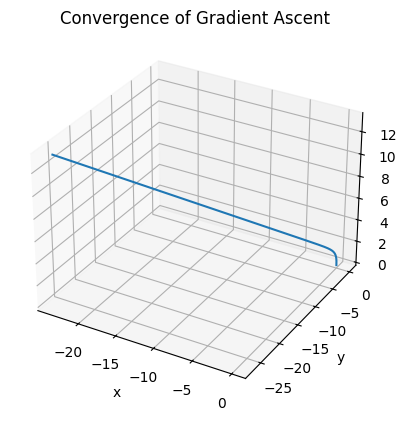

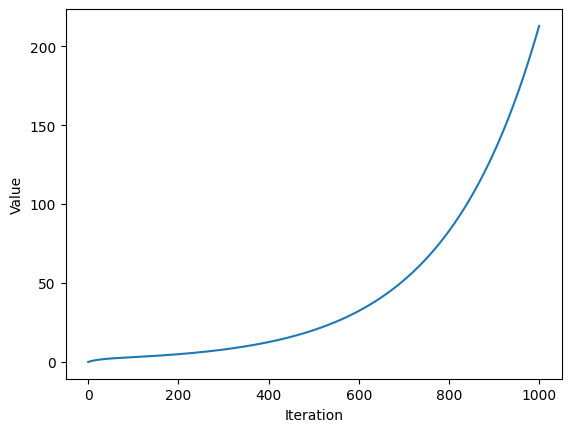

Optimal values: x = -23.86185646057129, y = -27.032466888427734, z = 13.430928230285645


In [4]:
#1b
iter = 1000
learningRate = 0.01

x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

conv = [[x.item()], [y.item()], [z.item()]]
optimizer = torch.optim.SGD([x, y, z], lr=learningRate, maximize=True)

for _ in range(iter):
    optimizer.zero_grad()
    loss = f2(x, y, z)
    loss.backward()
    optimizer.step()
    conv[0].append(x.item())
    conv[1].append(y.item())
    conv[2].append(z.item())
    
limit = 1000
plt.figure().add_subplot(111, projection='3d').plot(conv[0][:limit], conv[1][:limit], conv[2][:limit])
plt.xlabel('x'), plt.ylabel('y')
plt.title('Convergence of Gradient Ascent')
plt.show()
plt.plot(range(iter+1), [f2(conv[0][i], conv[1][i], conv[2][i]) for i in range(iter+1)])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()
print(f'Optimal values: x = {x.item()}, y = {y.item()}, z = {z.item()}')

It seems like the second function doesn't approach any maximum

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [5]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [6]:
from torch.autograd import Variable   

learningRate = 0.01 
epochs = 1000

model = torch.nn.Linear(1, 1) 

mse = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):

    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = mse(outputs, labels)
    
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch: {}, MSE: {}, model: {}, {}'.format(epoch, loss.item(), model.weight.item(), model.bias.item()))
 


epoch: 0, MSE: 177.64820861816406, model: 2.2117395401000977, 0.3854351341724396
epoch: 1, MSE: 30.922956466674805, model: 2.700800657272339, 0.4495328962802887
epoch: 2, MSE: 14.586906433105469, model: 2.8624658584594727, 0.5176708698272705
epoch: 3, MSE: 12.37839126586914, model: 2.916417360305786, 0.5862054228782654
epoch: 4, MSE: 11.715929985046387, model: 2.9349205493927, 0.653956413269043
epoch: 5, MSE: 11.237381935119629, model: 2.9417479038238525, 0.7205537557601929
epoch: 6, MSE: 10.794702529907227, model: 2.9447197914123535, 0.785893440246582
epoch: 7, MSE: 10.371247291564941, model: 2.946408987045288, 0.8499586582183838
epoch: 8, MSE: 9.964609146118164, model: 2.947662115097046, 0.9127609729766846
epoch: 9, MSE: 9.573948860168457, model: 2.9487578868865967, 0.9743208289146423
epoch: 10, MSE: 9.198623657226562, model: 2.9497885704040527, 1.0346614122390747
epoch: 11, MSE: 8.838027000427246, model: 2.95078444480896, 1.0938063859939575
epoch: 12, MSE: 8.491580963134766, model: 

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


In [ ]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


def linearReg(X, y, learning_rate, epochs):
    model = torch.nn.Linear(1, 1) 

    mse = torch.nn.MSELoss() 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    for _ in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mse(outputs, labels)
        loss.backward()
        optimizer.step()
        conv.append(loss.item())
        # print('epoch: {}, MSE: {}'.format(epoch, loss.item()))
    print('MSE: {}, model: {}, {}'.format(loss.item(), model.weight.item(), model.bias.item()))
    plt.plot(range(epochs), conv)
    plt.title('(Linear) Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()

    weights = model.weight.item()
    bias = model.bias.item()
    return conv, weights, bias


Copy change: I had a small mistake in the name of variable learning_rate which caused function not to work properly.

MSE: 0.009924414567649364, model: 2.9996845722198486, 4.019050121307373


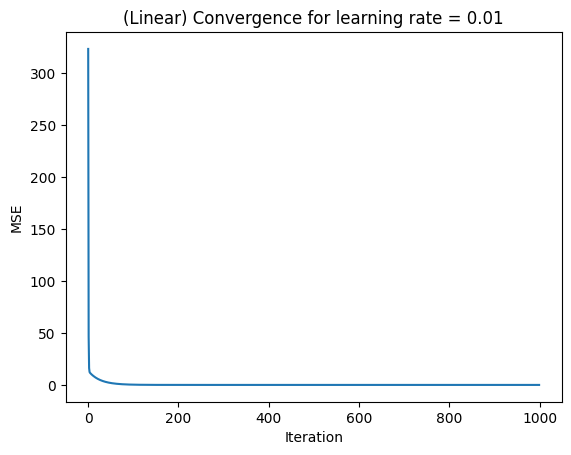

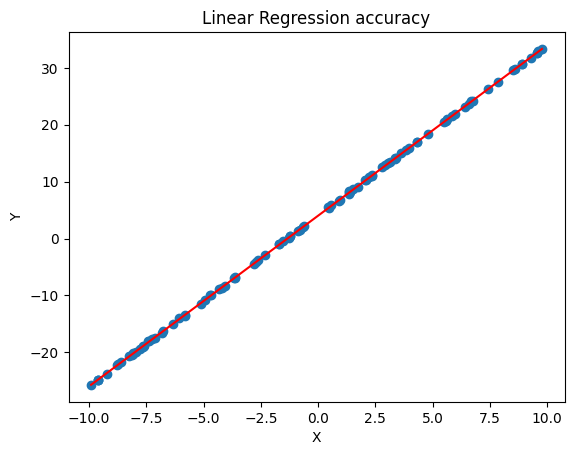

In [28]:
linearConv, w, b = linearReg(X, y, 0.01, 1000)

plt.scatter(X, y)
Xh_sorted = np.sort(X)
plt.plot(Xh_sorted, w*Xh_sorted + b, color='red')
plt.title('Linear Regression accuracy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


MSE: nan, model: nan, nan


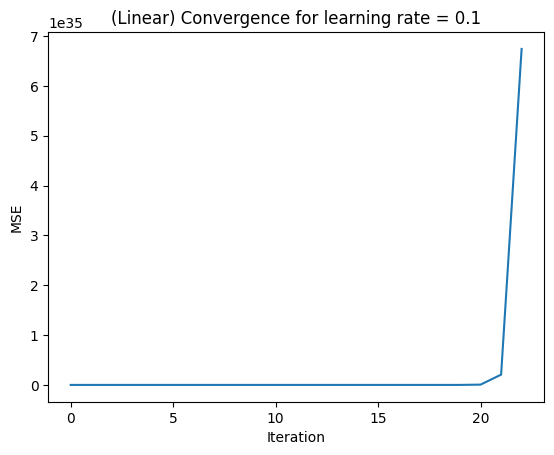

In [31]:
l, w, b = linearReg(X, y, 0.1, 1000)
# plt.scatter(X, y)
# Xh_sorted = np.sort(X)
# plt.plot(Xh_sorted, w*Xh_sorted + b, color='red')
# plt.title('Linear Regression accuracy')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

MSE: nan, model: nan, nan


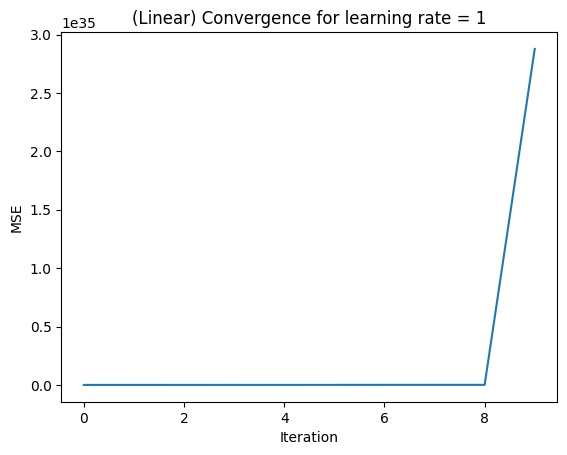

In [32]:
l, w, b = linearReg(X, y, 1, 1000)
# plt.scatter(X, y)
# Xh_sorted = np.sort(X)
# plt.plot(Xh_sorted, w*Xh_sorted + b, color='red')
# plt.title('Linear Regression accuracy')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

As we can see too big learning rate results in regression not being able to work properly, it reaches NaN's and ends after small number of iterations.

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [11]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


In [12]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

# I will use the fact that we can use the linear regression model to fit a polynomial regression model by using matrix multiplication
def polymonialReg(X, y, learning_rate, degree, epochs, normalize = False):
    
    # Normalize the dataset
    if normalize:
        X = (X - np.mean(X)) / np.std(X)
        y = (y - np.mean(y)) / np.std(y)
        # X = (X - np.min(X)) / (np.max(X) - np.min(X))
        # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    model = torch.nn.Linear(degree, 1)
    

    mse = torch.nn.MSELoss() 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    for _ in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(torch.cat([inputs**i for i in range(1, degree + 1)], dim = 1))

        loss = mse(outputs, labels)
        loss.backward()
        optimizer.step()
        
        conv.append(loss.item())

    weights = model.weight.detach().numpy().flatten()
    bias = model.bias.item()
    
    print('MSE: {}, model: ws={}, b={}'.format(loss.item(), weights, bias))
    plt.plot(range(epochs), conv)
    plt.title('(Poly) Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    
    return conv, weights, bias

MSE: 15.459857940673828, model: ws=[ 2.2325814 -1.6954237  2.87695  ], b=0.5119449496269226


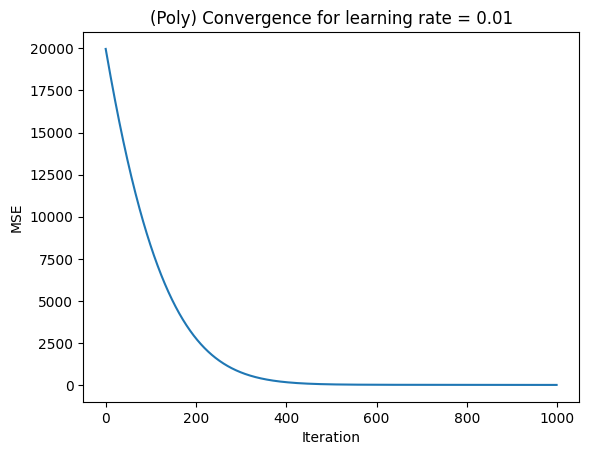

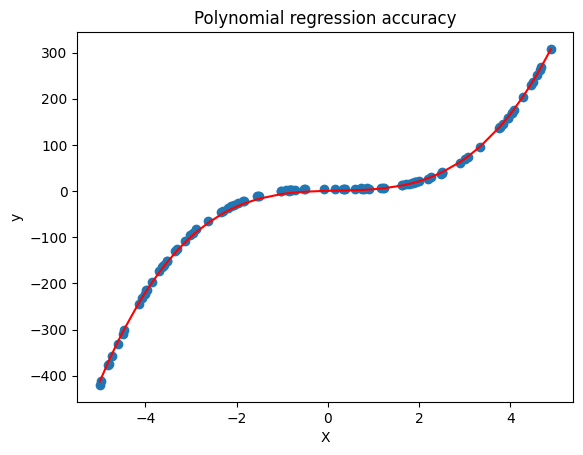

In [13]:
degree = 3
polyConv, weights, bias = polymonialReg(X, y, 0.01, degree, 1000)

def plotPolyAcc(X, y, weights, bias, degree):
    plt.scatter(X, y)
    Xh_sorted = np.sort(X)
    plt.plot(Xh_sorted, sum([weights[i-1] * np.array(Xh_sorted)**i for i in range(1, degree + 1)]) + bias, color='red')
    plt.title('Polynomial regression accuracy')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

plotPolyAcc(X, y, weights, bias, degree)

Comparision of loss for polymonial and linear regression:

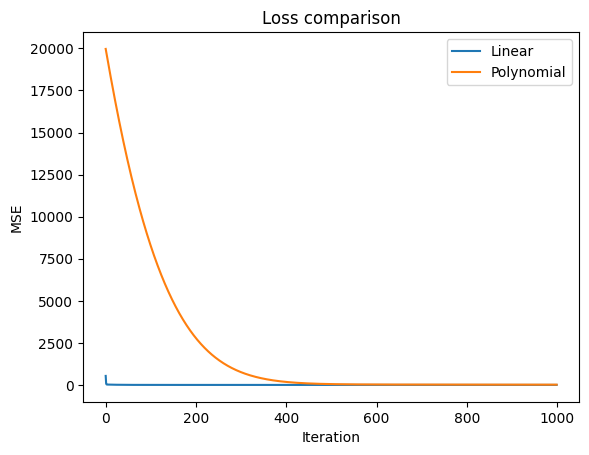

In [14]:
plt.plot(range(1000), linearConv, label='Linear')
plt.plot(range(1000), polyConv, label='Polynomial')
plt.title('Loss comparison')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

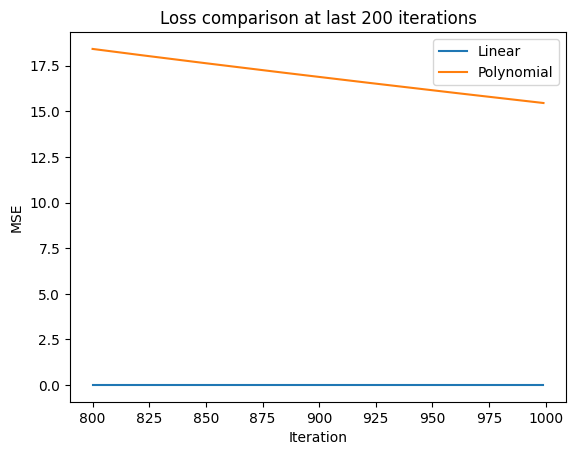

In [15]:
s = 800
plt.plot(range(s, 1000), linearConv[s:], label='Linear')
plt.plot(range(s, 1000), polyConv[s:], label='Polynomial')
plt.title('Loss comparison at last 200 iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [33]:
import numpy as np
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


MSE: 3336.6767578125, model: 1.884124994277954, 59.51642990112305


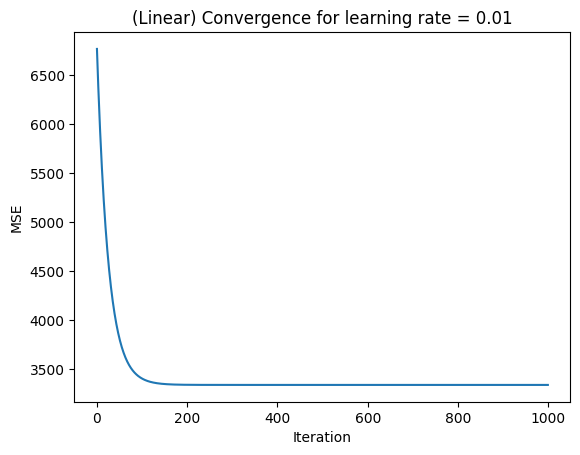

MSE: 41989779456.0, model: ws=[-0.5189101   0.57231194 -0.1031343   0.35914806 -0.34647787  0.42268068
  0.12783167  0.0904206  -0.00120373 -0.00105218], b=-0.029097285121679306


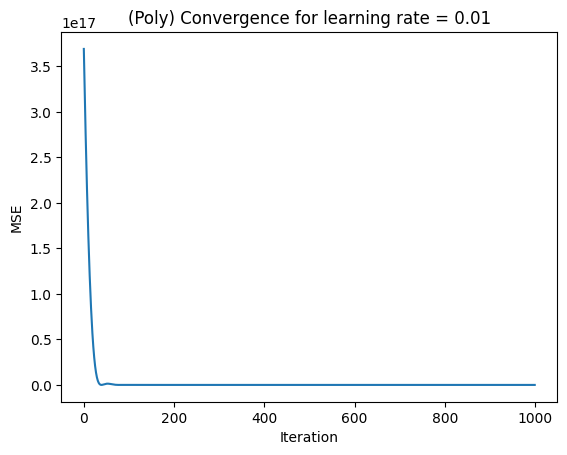

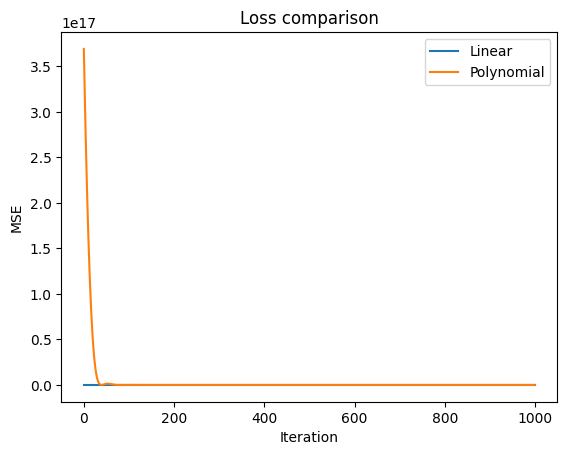

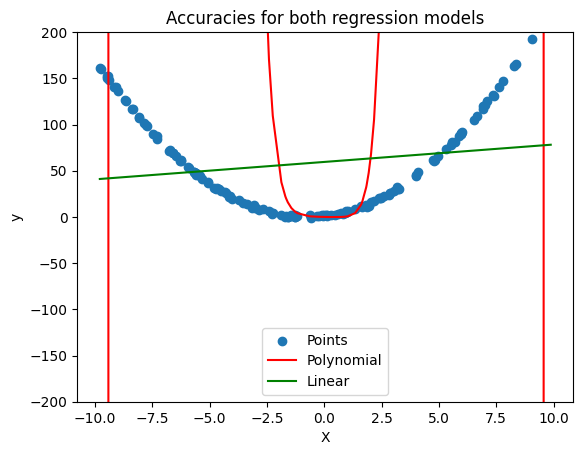

In [34]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon

def compare(X, y, learningRate, epochs, degree):
    linConv, w, b = linearReg(X, y, learningRate, epochs)
    polyConv, weights, bias = polymonialReg(X, y, learningRate, degree, epochs)
    plt.plot(range(epochs), linConv, label='Linear')
    plt.plot(range(epochs), polyConv, label='Polynomial')
    plt.title('Loss comparison')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()


    plt.scatter(X, y)
    Xh_sorted = np.sort(X)
    plt.plot(Xh_sorted, sum([weights[i-1] * np.array(Xh_sorted)**i for i in range(1, degree + 1)]) + bias, color='red')
    plt.plot(Xh_sorted, w*Xh_sorted + b, color='green')
    plt.title('Accuracies for both regression models')
    plt.legend(['Points', 'Polynomial', 'Linear'])
    plt.ylim(-200, 200)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

compare(X, y, 0.01, 1000, 10)

Polymonial looks like a 2 degree functions but is still off

MSE with L2: 3.296034997613363e+16, model: ws=[-0.30423853  0.21032162 -0.16091545 -0.15925056 -0.13351874 -0.21758659
 -0.38503444 -0.24782568  0.14553475  0.09135709], b=0.16630089282989502


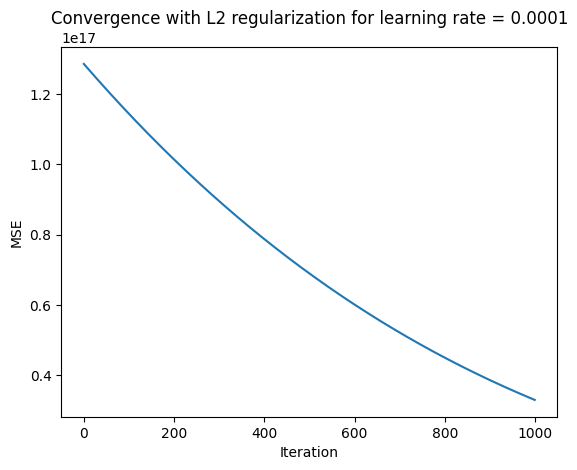

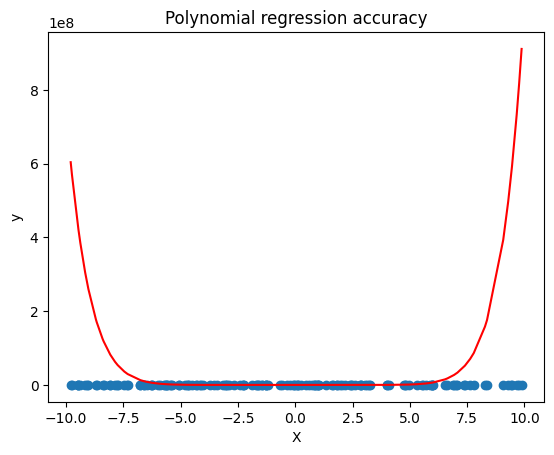

In [36]:
# Apply L2 regularization to the polynomial model
def polymonialRegL2(X, y, learning_rate, degree, epochs, lambda_reg, normalize = False):

    if normalize:
        X = (X - np.min(X)) / (np.max(X) - np.min(X))
        y = (y - np.min(y)) / (np.max(y) - np.min(y))

    model = torch.nn.Linear(degree, 1)

    mse = torch.nn.MSELoss() 

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    
    for _ in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(torch.cat([inputs**i for i in range(1, degree + 1)], dim = 1))
        
        loss = mse(outputs, labels) + lambda_reg * sum(p.pow(2).sum() for p in model.parameters())          

        loss.backward()
        optimizer.step()
        conv.append(loss.item())

    weights = model.weight.detach().numpy().flatten()
    bias = model.bias.item()
    
    print('MSE with L2: {}, model: ws={}, b={}'.format(loss.item(), weights, bias))
    plt.plot(range(epochs), conv)
    plt.title('Convergence with L2 regularization for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    
    plotPolyAcc(X, y, weights, bias, degree)
    
    return conv

# Fit polynomial model with L2 regularization
polyConvL2 = polymonialRegL2(X, y, 0.0001, 10, 1000, 0.001)

Regression kind of takes form of correct function but is still off

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an sgd from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` sgd.


In [19]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

def myLinReg(X, y, learning_rate, epochs):

    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    weight = torch.tensor(0.0)
    bias = torch.tensor(0.0)
    grad = [None, None]
    conv = []
    for _ in range(epochs):

        loss = torch.mean((weight * inputs + bias - labels)**2)
        grad[0] = torch.mean((weight * inputs + bias - labels) * inputs)
        grad[1] = torch.mean(weight * inputs + bias - labels)
        weight = weight - learning_rate * grad[0]
        bias = bias - learning_rate * grad[1]
        conv.append(loss.item())

    # weight = weight.detach().numpy()
    # bias = bias.detach().numpy()
    
    print('MSE: {}, model: {} {}'.format(loss, weight, bias))
    plt.plot(range(epochs), conv)
    plt.title('Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    return conv, weight, bias

MSE: 0.009924468584358692, model: 2.999681234359741 4.018868446350098


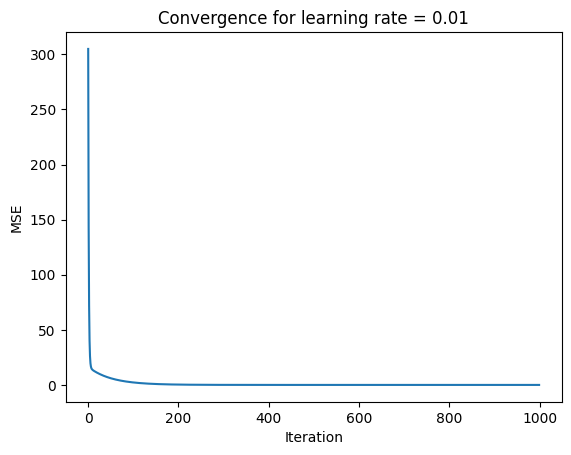

MSE: 0.009924414567649364, model: 2.9996845722198486, 4.019050121307373


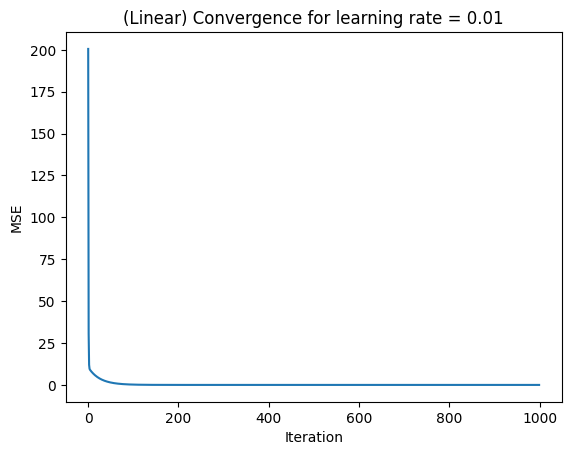

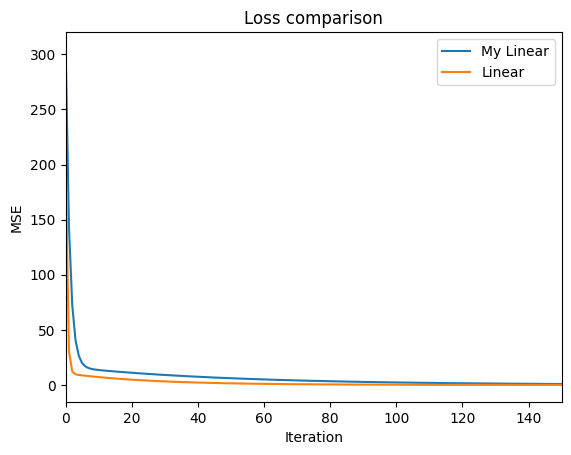

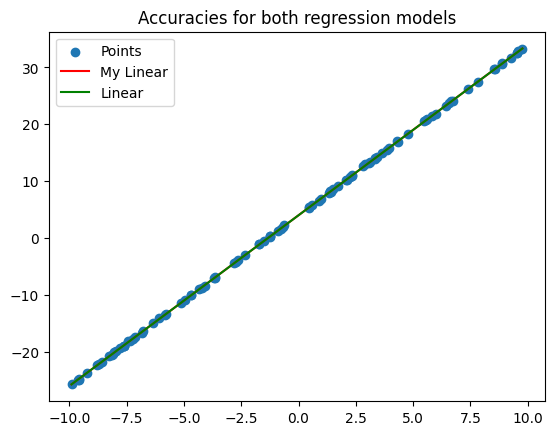

In [20]:
myConv, wm, bm = myLinReg(X, y, 0.01, 1000)
linConv, wl, bl = linearReg(X, y, 0.01, 1000)

plt.plot(range(1000), myConv, label='My Linear')
plt.plot(range(1000), linConv, label='Linear')
plt.title('Loss comparison')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(0, 150)
plt.legend()
plt.show()

plt.scatter(X, y)
Xh_sorted = np.sort(X)
plt.plot(Xh_sorted, wm*Xh_sorted + bm, color='red')
plt.plot(Xh_sorted, wl*Xh_sorted + bl, color='green')
plt.title('Accuracies for both regression models')
plt.legend(['Points', 'My Linear', 'Linear'])
plt.show()

We can see that my implementation returns similar result but as it shows on the diagram, it takes more iterations to get closer

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [21]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


MSE: 0.04818686470389366, model: 3.997257947921753, -3.00860333442688


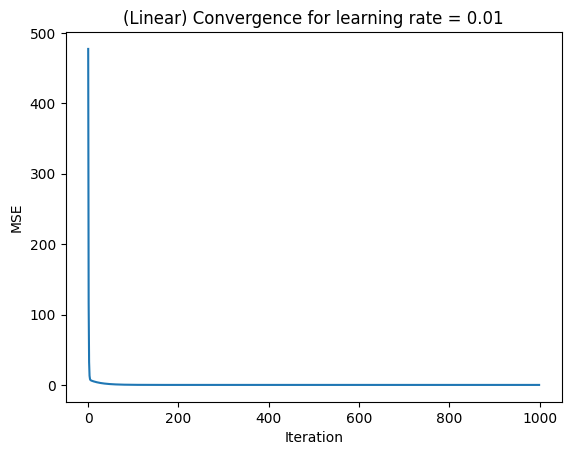

MSE: 0.04225744307041168, model: 3.995333194732666, -2.950333595275879


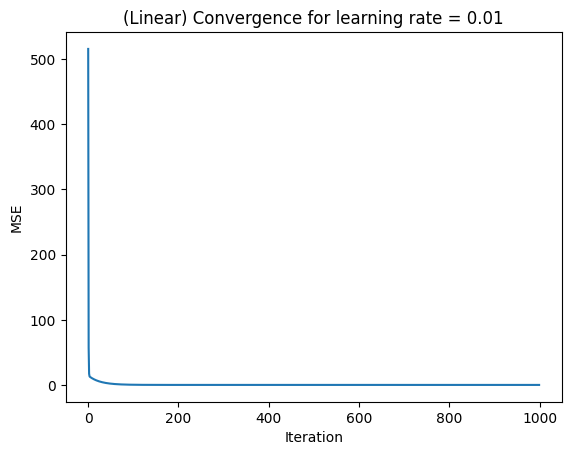

MSE: 0.041448578238487244, model: 4.001463890075684, -3.006350517272949


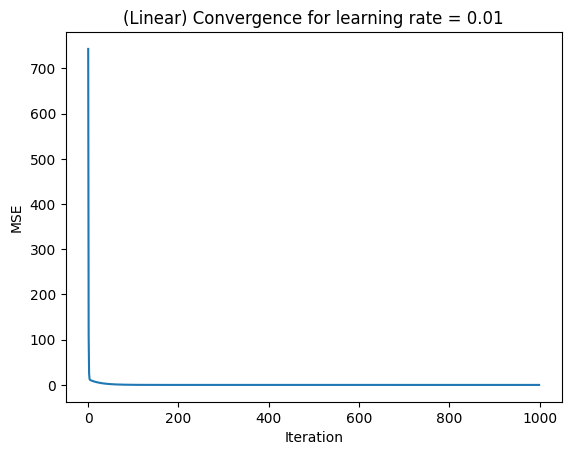

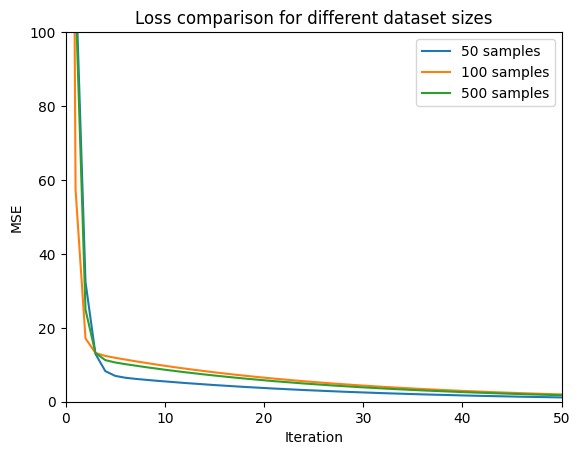

In [22]:
convs = []
for dset in datasets:
    linConv, w, b = linearReg(dset[0], dset[1], 0.01, 1000)
    # plt.plot(range(1000), linConv, label=f'{len(dset[0])} samples')
    convs.append(linConv)

plt.plot(range(1000), convs[0], label=f'{sizes[0]} samples')
plt.plot(range(1000), convs[1], label=f'{sizes[1]} samples')
plt.plot(range(1000), convs[2], label=f'{sizes[2]} samples')
plt.title('Loss comparison for different dataset sizes')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.legend()
plt.show()

A little close up on the part of comparistion for all sets for better view, but it's still hard to get any conclusions because the plots are intertwining each other.

## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [23]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


MSE: 5.131608963012695, model: ws=[-0.13138646  1.0523459   0.18541732  0.04237855 -0.00626618], b=2.313380241394043


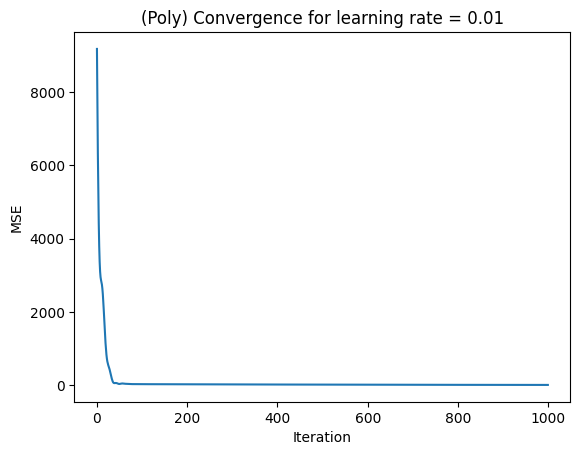

MSE: 4664669184.0, model: ws=[ 0.862258   -0.01155101  0.4743802   0.29038966  0.70756286  0.16931383
  0.57502234  0.22753197  0.15515076  0.31107783  0.31273732 -0.03550351
 -0.03466445  0.00096021  0.000899  ], b=0.1233934536576271


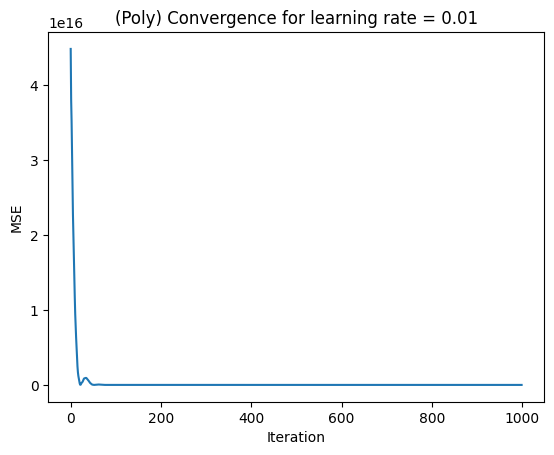

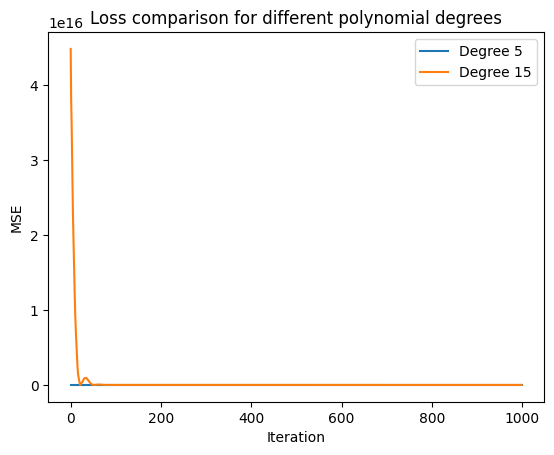

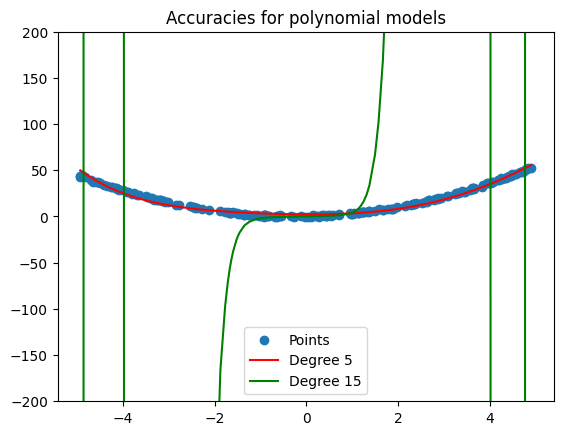

In [24]:
poly5, ws5, bs5 = polymonialReg(X, y, 0.01, 5, 1000)
poly15, ws15, bs15 = polymonialReg(X, y, 0.01, 15, 1000)

plt.plot(range(1000), poly5, label='Degree 5')
plt.plot(range(1000), poly15, label='Degree 15')
plt.title('Loss comparison for different polynomial degrees')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.scatter(X, y)
Xh_sorted = np.sort(X)
plt.plot(Xh_sorted, sum([ws5[i-1] * np.array(Xh_sorted)**i for i in range(1, 6)]) + bs5, color='red')
plt.plot(Xh_sorted, sum([ws15[i-1] * np.array(Xh_sorted)**i for i in range(1, 16)]) + bs15, color='green')
plt.title('Accuracies for polynomial models')
plt.legend(['Points', 'Degree 5', 'Degree 15'])
plt.ylim(-200, 200)
plt.show()


As we can see the smaller degree model achieves better results.

## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [25]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


MSE: 0.4068313241004944, model: -0.0849534347653389, -0.0441044457256794


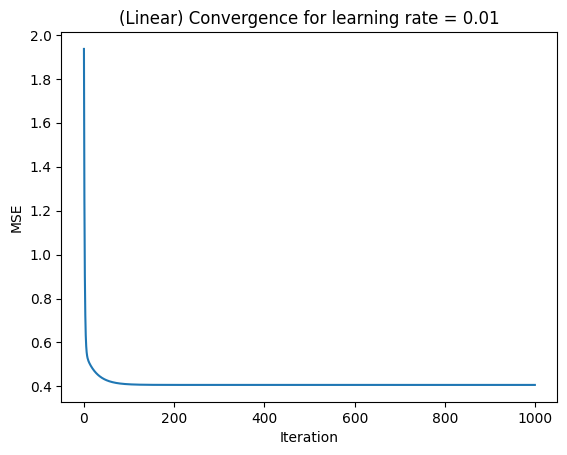

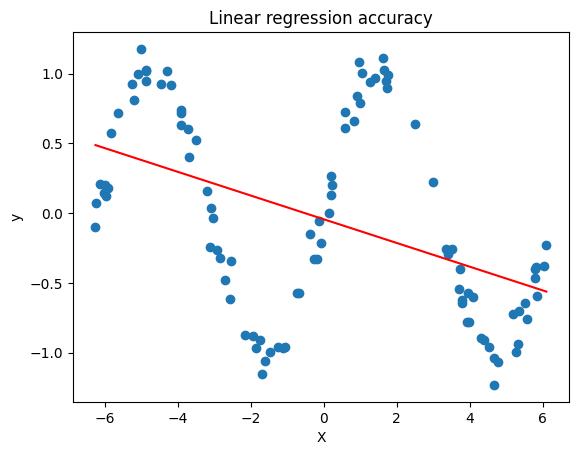

In [26]:
linConv, w, b = linearReg(X, y, 0.01, 1000)

plt.scatter(X, y)
Xh_sorted = np.sort(X)
plt.plot(Xh_sorted, w*Xh_sorted + b, color='red')
plt.title('Linear regression accuracy')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In summary, linear models are simple and interpretable but not suitable for capturing non-linear relationships. 
Even though by the results of loss functions, the linear model is not the best model for this dataset, as we can see it in comparision of result and the actual function.


Little comment for polymonial regression:

I tried many different combinations of learning rates, epochs, data normalization etc. but I couldn't find the right one that would make all of the results work as I wish to. I beleive my algorithms are correct and it just seems to me that the data we are given might be a problem in some cases.